# Opening a Bar in San Francisco



## 1. Introduction

### 1.1.  Business Problem

It's a rainy weekend in San Francisco and you're sitting at a table across from your three best friends, spit-balling dreams of owning your own bar. You don't know much about what you have to do logistically to acquire or build a bar, but you and your friends seem to have millions of ideas for the types of drinks and atmosphere that would make your bar the best in the city. You have a heated debate over the optimal neighborhood for setting up shop, but you can all agree that you would like it to be located in a safer part of the city and in a spot where people already tend to hang out. Assuming money isn't an issue, and you can just charge $9 for a beer to keep up with being located in the more expensive parts of town (the joys of San Francisco living), how can you figure out the best place in the city to start your dream bar? 

That's what this project aims to figure out. 




### 1.2. Target Audience

The target audience of this report would be anyone who wants to buy or build a bar in San Francisco, or anyone in San Francisco just looking for a nice area to grab a drink.



## 2. Data

In order to best make this decision, we're gonna need some data. Fortunately, the city of San Francisco has hundreds of public datasets that describe various aspects of the city, and Foursquare API allows free access to some of its location and venue data. 

Altogether, we are looking at three sets of data for our analysis:


### 1. **[San Francisco Crime Data](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783)**.
    - This is going to help us by providing a list of every neighborhood in San Francisco, and allowing us to select one of the safest areas for our bar
    
    
### 2. **[San Francisco Registered Business Data](https://data.sfgov.org/Economy-and-Community/Registered-Business-Locations-San-Francisco/g8m3-pdis)**.
    - This is going to help us roughly gauge the foot traffic in each neighborhood of San Francisco (at least on the weekdays) by providing the number of businesses located within each neighborhood.
    
    
### 3. **Foursquare API**
    - Foursquare data is robust and provides location data for Apple and Uber. Foursquare API allows you to retrieve information about the most popular spots in each neighborhood in San Francisco. This will be another good indication of foot traffic for particular venue types. Calling the Foursquare API returns a JSON file, which can be turned into a dataframe for analysis in python.
    

    

## 3. Methodology

Let's start by improting all necessary libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In order to use Foursquare API, we need to input our credentials

In [44]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: L1MJ4CXMUOHWTLMMCRBJNTE0FPCBCL0MYTEEROOZBEHIWEUR
CLIENT_SECRET:J5TBRH31K5O1BZSJJBFNVFFRU1BIJ02MWIRH4LVX2SLN4MNN


And now we can upload both of our San Francisco datasets. Let's start by gathering registered businesses in the Bay Area.

### Registered Business Data

In [3]:
business = pd.read_csv('https://data.sfgov.org/api/views/g8m3-pdis/rows.csv?accessType=DOWNLOAD')
print(business.shape)
business.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12,13,14,15,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(250406, 26)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,Location Start Date,Location End Date,Mail Address,Mail City,Mail Zipcode,Mail State,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,1103593-08-161,1049564,Anjan Rajbhandari,Uber,28134 Harvey Ave,Hayward,CA,94544.0,03/24/2014,12/31/2017,03/24/2014,12/31/2017,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1218784-04-191,1100756,Luisa Alberto,High Five Sf,467 14th St,San Francisco,CA,94103.0,04/15/2019,04/15/2019,04/15/2019,04/15/2019,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,8.0,Mission,NaN,NaN
2,1223199-05-191,1102424,"Sunrun, Inc.","Sunrun, Inc",595 Market St,San Francisco,CA,94105.0,06/01/2008,06/01/2008,06/01/2008,06/01/2008,NaN,NaN,NaN,NaN,2200-2299,Utilities,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,1220748-05-191,1101579,Felix Hernandez,Tru-Tec Electric,44 Mcaker Ct,San Mateo,CA,94403.0,05/06/2019,06/18/2019,05/06/2019,06/18/2019,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,1135452-02-171,1065102,Tirta Llc,Tirta,105 Hudson St 6s,New York City,NY,10013.0,06/09/2016,12/23/2018,06/09/2016,12/23/2018,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#just pull the columns we need
business2 = business[['Business Start Date','DBA Name', 'Neighborhoods - Analysis Boundaries']].copy()

#drop null values
business3 = business2.dropna()

#convert business start date to datetime
business3['Business Start Date'] = business3['Business Start Date'].astype('datetime64[ns]') 

#let's just look at areas that have seen the most businesses start in the last decade.
business4 = business3.loc[business3['Business Start Date'] > '2010-01-01']

#let's also rename 'Neighborhoods - Analysis Boundaries' to just be 'Neighborhoods'
business4.rename(columns={'Neighborhoods - Analysis Boundaries': 'Neighborhood'}, inplace = True)

#let's do the same thing for the business name
business4.rename(columns={'DBA Name': 'Business Name'}, inplace = True)

business4.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Business Start Date,Business Name,Neighborhood
1,2019-04-15,High Five Sf,Mission
211,2015-01-01,Erhan Ersin,Tenderloin
234,2017-05-08,2100 Rivera,Sunset/Parkside
246,2012-03-27,Robert P Moseley,Outer Richmond
282,2012-05-01,Band Width,Tenderloin


In [5]:
#Count the number of businesses in each neighborhood by grouping the data
business5 = business4.groupby('Neighborhood', as_index=False).count()
business5.reset_index()
#let's get rid of the business start date, we won't be needing it anymore
business5.drop(columns = 'Business Start Date',inplace = True)
#rename our "business name" column to "Businesses" to reflect the count per neighborhood
business5.rename(columns={'Business Name': 'Businesses'}, inplace = True)
#and sort the data
business6 = business5.sort_values(by= ['Businesses'], ascending = False).head(10)
business6.reset_index(drop=True)
business6

,Neighborhood,Businesses
5,Financial District/South Beach,11244
18,Mission,6191
33,South of Market,5282
34,Sunset/Parkside,4077
0,Bayview Hunters Point,3341
25,Outer Richmond,2736
16,Marina,2530
2,Castro/Upper Market,2483
39,West of Twin Peaks,2354
9,Hayes Valley,2351


In [6]:
#for reference, here is every neighborhood in SF as well as the count of registered businesses
business7 = business5.sort_values(by= ['Businesses'], ascending = False)
business7.reset_index(drop=True)
print(business7.shape)
business7

(41, 2)


,Neighborhood,Businesses
5,Financial District/South Beach,11244
18,Mission,6191
33,South of Market,5282
34,Sunset/Parkside,4077
0,Bayview Hunters Point,3341
25,Outer Richmond,2736
16,Marina,2530
2,Castro/Upper Market,2483
39,West of Twin Peaks,2354
9,Hayes Valley,2351


excellent. now let's plot our data to get a good view

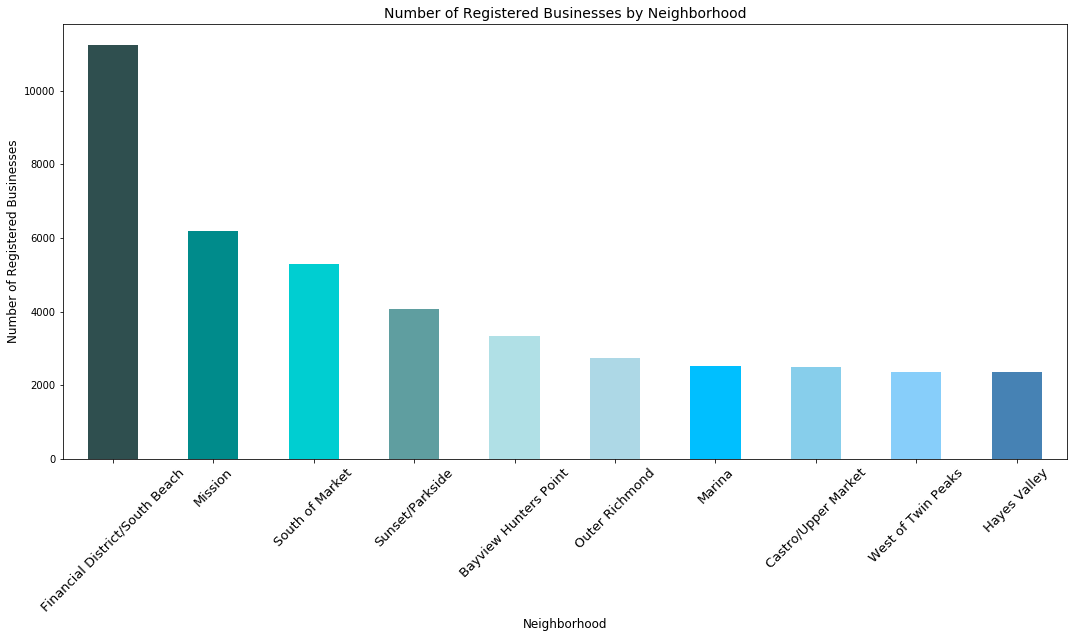

In [7]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


business6.plot.bar(x = 'Neighborhood', y = 'Businesses', title = "Number of Registered Businesses by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Businesses', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Registered Businesses by Neighborhood', fontsize = 14)
plt.show()


It looks like the Financial District has the most businesses, but there are plenty of others that have lots of people working! Let's use the top 10 neighborhoods as our starting point.

Next, we want to make sure our bar is in a safe part of town. So let's use San Francisco's crime data from the last 5 years to narrow down our list.

### Crime Data

In [8]:
crime = pd.read_csv('https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD')
print(crime.shape)
crime.head()

(294865, 35)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File
0,2019/08/15 11:41:00 AM,2019/08/15,11:41,2019,Thursday,2019/10/01 02:06:00 PM,85424006374,854240,196208089,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019/09/17 10:00:00 PM,2019/09/17,22:00,2019,Tuesday,2019/10/02 10:01:00 PM,85426606374,854266,196208205,NaN,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019/10/04 02:25:00 PM,2019/10/04,14:25,2019,Friday,2019/10/04 04:13:00 PM,85442603474,854426,190746203,192772728.0,II,Initial,NaN,3474,Robbery,Robbery - Other,"Robbery, Att., W/ Force",Open or Active,BALBOA ST \ GREAT HWY,28009000.0,Richmond,Outer Richmond,1.0,37.775076,-122.511295,POINT (-122.51129492624534 37.77507596005672),8.0,8.0,4.0,29.0,NaN,NaN,NaN,NaN,NaN
3,2019/10/03 07:30:00 PM,2019/10/03,19:30,2019,Thursday,2019/10/03 11:25:00 PM,85419706244,854197,190744514,192764437.0,II,Initial,NaN,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,MARKET ST \ RESERVOIR ST,25877000.0,Mission,Castro/Upper Market,8.0,37.768770,-122.427462,POINT (-122.42746205880601 37.76877049785351),28.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
4,2019/10/04 04:53:00 PM,2019/10/04,16:53,2019,Friday,2019/10/04 04:53:00 PM,85446351040,854463,190746532,192772932.0,II,Initial,NaN,51040,Non-Criminal,Non-Criminal,Aided Case,Open or Active,42ND AVE \ CLEMENT ST \ VETERANS DR,27919000.0,Richmond,Outer Richmond,1.0,37.781177,-122.503086,POINT (-122.5030864538133 37.781176766186576),6.0,8.0,4.0,29.0,NaN,NaN,NaN,NaN,NaN


In [9]:
#take just the columns we need
crime1 = crime[['Analysis Neighborhood','Incident Category', 'Incident Date']]

#drop all null values
crime2 = crime1.dropna()

#convert incident date to datetime
crime2['Incident Date'] = crime2['Incident Date'].astype('datetime64[ns]') 

#filter to just crimes in the last 5 years, as the neighborhoods in san francisco are rapidly changing and being gentrified, we want data that is relevant to today's crime.
crime3 = crime2.loc[crime2['Incident Date'] > '2015-01-01']

#There's lots of scary crimes out there, but let's make sure we aren't factoring in non-criminal police reports, because that data will pollute our insights.
crime4 = crime3.loc[crime3['Incident Category'] != 'Non-Criminal']

#change the name of 'Analysis Neighborhood' to 'Neighborhood'
crime4.rename(columns={'Analysis Neighborhood': 'Neighborhood'}, inplace = True)

crime4.head(20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Neighborhood,Incident Category,Incident Date
2,Outer Richmond,Robbery,2019-10-04
3,Castro/Upper Market,Larceny Theft,2019-10-03
5,North Beach,Larceny Theft,2019-10-02
6,Outer Richmond,Other Miscellaneous,2019-10-04
7,Lakeshore,Disorderly Conduct,2019-10-04
8,Visitacion Valley,Motor Vehicle Theft,2019-10-04
9,South of Market,Larceny Theft,2019-09-05
11,Bernal Heights,Other Miscellaneous,2019-10-04
12,Bayview Hunters Point,Disorderly Conduct,2019-10-04
13,Nob Hill,Larceny Theft,2019-10-03


In [10]:
#count the number of crimes in each neighborhood
crime5 = crime4.groupby('Neighborhood', as_index=False).count()
#get rid of Incident Date
crime5.drop(columns = 'Incident Date',inplace = True)
#rename our column to reflect the counts of incidents
crime5.rename(columns={'Incident Category': 'Incidents'}, inplace = True)
#and sort our values
crime6 = crime5.sort_values(by= ['Incidents'], ascending = False)
crime7 = crime6.head(10)
crime7

,Neighborhood,Incidents
18,Mission,30502
35,Tenderloin,26779
5,Financial District/South Beach,25276
33,South of Market,22722
0,Bayview Hunters Point,15054
22,North Beach,8682
40,Western Addition,8595
2,Castro/Upper Market,7994
20,Nob Hill,7521
34,Sunset/Parkside,7344


Let's have a look at our data graphically.

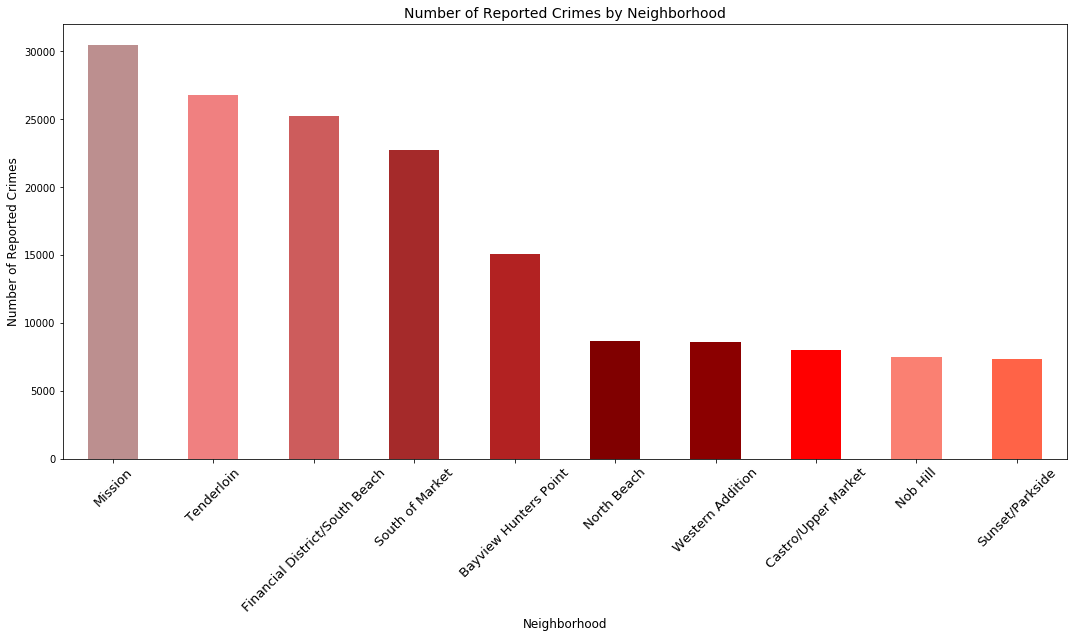

In [11]:

crime7.plot.bar(x = 'Neighborhood', y = 'Incidents', title = "Crime Incidents by Neighborhood", legend = None, rot= 45, figsize = (18, 8), color=['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato'])
plt.ylabel('Number of Reported Crimes', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.title('Number of Reported Crimes by Neighborhood', fontsize = 14)
plt.show()

It looks like there are 5 spots with heavy crime rates in San Francisco, and the rest seem on par with eachother.

Let's take our 10 favorite neighborhoods from before and sort out these 5 Neighborhoods with the highest crime rate.

In [12]:
#get a dataframe with the 5 highest incident neighborhoods
crime8 = crime7.head(5)
crime8

,Neighborhood,Incidents
18,Mission,30502
35,Tenderloin,26779
5,Financial District/South Beach,25276
33,South of Market,22722
0,Bayview Hunters Point,15054


In [13]:
'''start by merging the datasets and making a new dataset that incldues the neighborhoods 
which wereamong the top 10 for businesses AND are amond the top 5 for crime '''
Overlap = business6.merge(crime8, on=['Neighborhood'])
'''then take this joined dataframe and remove all common values from your list of top 10 
neighborhoods for businesses'''
SF_Neighborhoods = business6[(~business6.Neighborhood.isin(Overlap.Neighborhood))]
'''and what you have is the top neighborhoods for businesses that are NOT the top 
neighborhoods for crime'''
SF_Neighborhoods.head()

,Neighborhood,Businesses
34,Sunset/Parkside,4077
25,Outer Richmond,2736
16,Marina,2530
2,Castro/Upper Market,2483
39,West of Twin Peaks,2354


Now let's get the coordinates of each of our selected neighborhoods.

In [14]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="SF_explorer")
SF_Neighborhoods['Coordinates'] = SF_Neighborhoods['Neighborhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
SF_Neighborhoods

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,4077,"(34.77319885, -82.3238098061844)"
25,Outer Richmond,2736,"(44.108805, -69.798725)"
16,Marina,2530,"(36.6900785, -121.800639830262)"
2,Castro/Upper Market,2483,"(-34.6274246, -58.4199519)"
39,West of Twin Peaks,2354,"(34.2388955, -117.2336533)"
9,Hayes Valley,2351,"(37.7766853, -122.4229361)"


Yikes, looks like geopy had them all over the place. Marina and Hayes Valley seem to be right, but let's plug in values from Google Maps for the rest and clean up the coordinates a little.

In [15]:
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Sunset/Parkside' , 'Coordinates'] = "(37.751616, -122.490810)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Outer Richmond' , 'Coordinates'] = "(37.780001, -122.490229)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Castro/Upper Market' , 'Coordinates'] = "(37.762932, -122.435395)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'West of Twin Peaks' , 'Coordinates'] = "(37.739871, -122.460106)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Marina' , 'Coordinates'] = "(37.801406, -122.439718)"
SF_Neighborhoods.loc[SF_Neighborhoods.Neighborhood == 'Hayes Valley' , 'Coordinates'] = "(37.776685, -122.422936)"
SF_Neighborhoods

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Neighborhood,Businesses,Coordinates
34,Sunset/Parkside,4077,"(37.751616, -122.490810)"
25,Outer Richmond,2736,"(37.780001, -122.490229)"
16,Marina,2530,"(37.801406, -122.439718)"
2,Castro/Upper Market,2483,"(37.762932, -122.435395)"
39,West of Twin Peaks,2354,"(37.739871, -122.460106)"
9,Hayes Valley,2351,"(37.776685, -122.422936)"


### Merging Datasets

Now, we can add the Latitude and Longitude in separate columns and merge our datasets

In [16]:
SF = SF_Neighborhoods.merge(crime6, on=['Neighborhood'])
SF.rename(columns={'Incidents':'Crimes'}, inplace = True)
SF = SF[['Neighborhood', 'Businesses', 'Crimes','Coordinates']]
SF['Coordinates'].to_string()
SF[['Latitude','Longitude']] = SF['Coordinates'].str.strip('(').str.strip(')').str.split(', ', expand=True)

SF

,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude
0,Sunset/Parkside,4077,7344,"(37.751616, -122.490810)",37.751616,-122.490810
1,Outer Richmond,2736,5657,"(37.780001, -122.490229)",37.780001,-122.490229
2,Marina,2530,6205,"(37.801406, -122.439718)",37.801406,-122.439718
3,Castro/Upper Market,2483,7994,"(37.762932, -122.435395)",37.762932,-122.435395
4,West of Twin Peaks,2354,5106,"(37.739871, -122.460106)",37.739871,-122.460106
5,Hayes Valley,2351,7164,"(37.776685, -122.422936)",37.776685,-122.422936


### Foursquare Data Analysis

Let's write a function to search the most popular venues within a .5 mile radius of our neighborhoods.

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
SF_venues = getNearbyVenues(names=SF['Neighborhood'],
                                   latitudes=SF['Latitude'],
                                   longitudes=SF['Longitude']
                                  )

Sunset/Parkside
Outer Richmond
Marina
Castro/Upper Market
West of Twin Peaks
Hayes Valley


In [19]:
#Le'ts see the shape of our dataframe
print(SF_venues.shape)
SF_venues.head()

(180, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sunset/Parkside,37.751616,-122.490810,S&T Hong Kong Seafood,37.753702,-122.491278,Dim Sum Restaurant
1,Sunset/Parkside,37.751616,-122.490810,Quan Ngon Vietnamese Noodle House,37.753624,-122.490549,Vietnamese Restaurant
2,Sunset/Parkside,37.751616,-122.490810,TJ Brewed Tea and Real Fruit (TJ Cups),37.753561,-122.490028,Bubble Tea Shop
3,Sunset/Parkside,37.751616,-122.490810,Donut Time,37.753651,-122.489439,Donut Shop
4,Sunset/Parkside,37.751616,-122.490810,Polly Ann Ice Cream,37.753454,-122.497765,Ice Cream Shop


In [20]:
#take a look at how many venues were pulled for each neighborhood
SF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Castro/Upper Market,30,30,30,30,30,30
Hayes Valley,30,30,30,30,30,30
Marina,30,30,30,30,30,30
Outer Richmond,30,30,30,30,30,30
Sunset/Parkside,30,30,30,30,30,30
West of Twin Peaks,30,30,30,30,30,30


In [21]:
#the number of unique types of venues pulled
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 97 uniques categories.


what are the most common venue categories in our 6 selected neighborhoods?

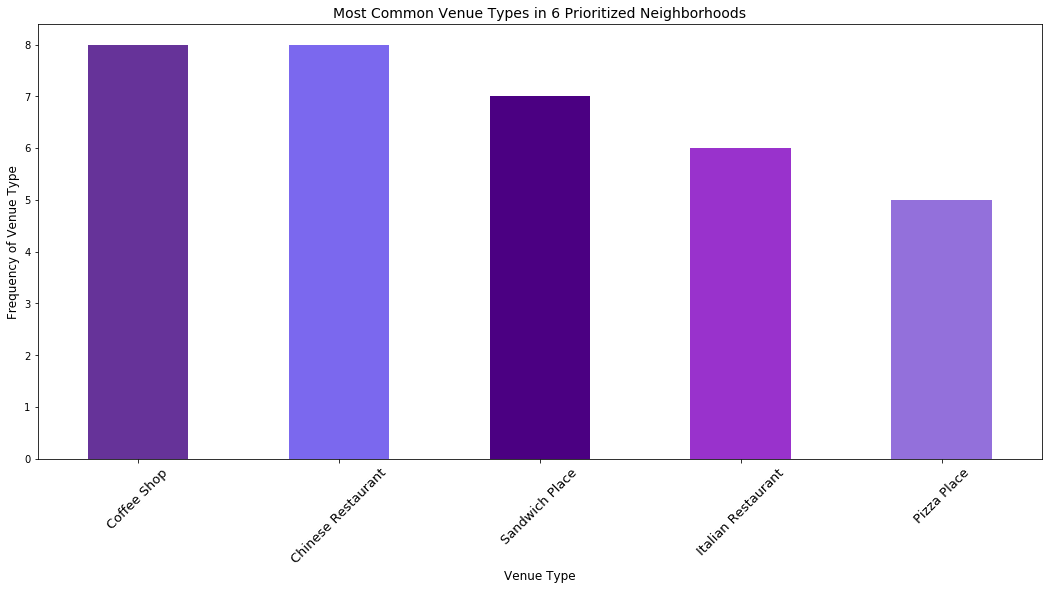

In [22]:
SF_top_venues = SF_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(5)
SF_top_venues = SF_top_venues[['Venue Category','Neighborhood']]
SF_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
SF_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 6 prioritized neighborhoods", rot= 45, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 6 Prioritized Neighborhoods', fontsize = 14)
plt.show()

It looks like coffee shops are the most common venue type, followed by some restaurants, and finally wine bars.

Let's do some one hot encoding to further analyze our results.

In [23]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Arts & Crafts Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Garden,Bookstore,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Butcher,Café,Candy Store,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Elementary School,Event Space,Field,Flower Shop,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Korean Restaurant,Liquor Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle School,Monument / Landmark,Movie Theater,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pub,Public Art,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunset/Parkside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
#examine shape of new dataframe
SF_onehot.shape

(180, 98)

In [25]:
#now group the data
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
print(SF_grouped.shape)
SF_grouped

(6, 98)


,Neighborhood,American Restaurant,Antique Shop,Arts & Crafts Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Garden,Bookstore,Boutique,Brazilian Restaurant,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Butcher,Café,Candy Store,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cosmetics Shop,Cupcake Shop,Cycle Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Elementary School,Event Space,Field,Flower Shop,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Korean Restaurant,Liquor Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle School,Monument / Landmark,Movie Theater,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Pub,Public Art,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Castro/Upper Market,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.100000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333
1,Hayes Valley,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.100000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.033333,0.033333
2,Marina,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0

We can now see the frequency of the top 5 types of venues for each neighborhood.

In [26]:
#print each neighborhood with the top 5 most common venues
num_top_venues = 5

for hood in SF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Castro/Upper Market----
                     venue  freq
0              Coffee Shop  0.10
1  New American Restaurant  0.07
2              Candy Store  0.03
3           Clothing Store  0.03
4             Cycle Studio  0.03


----Hayes Valley----
               venue  freq
0  French Restaurant  0.10
1           Wine Bar  0.07
2        Coffee Shop  0.07
3       Cocktail Bar  0.07
4        Yoga Studio  0.03


----Marina----
                  venue  freq
0    Italian Restaurant  0.07
1         Deli / Bodega  0.07
2     French Restaurant  0.07
3  Gym / Fitness Center  0.07
4   American Restaurant  0.03


----Outer Richmond----
                venue  freq
0                Café  0.10
1      Sandwich Place  0.07
2  Chinese Restaurant  0.07
3  Seafood Restaurant  0.07
4       Burrito Place  0.03


----Sunset/Parkside----
                 venue  freq
0   Chinese Restaurant  0.13
1           Playground  0.07
2  Japanese Restaurant  0.07
3   Dim Sum Restaurant  0.07
4       Ice Cream Shop  0.03

Now we can place our data into a dataframe of the most popular venues for each neighborhood.

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(SF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,Castro/Upper Market,Coffee Shop,New American Restaurant,Yoga Studio,Salon / Barbershop,Mediterranean Restaurant,Clothing Store,Liquor Store,Candy Store,Jewelry Store,Pizza Place,Burger Joint,Public Art,Indie Movie Theater,Cycle Studio,Ice Cream Shop,Sandwich Place,Historic Site,Wine Bar,Flower Shop,Bakery,Gym,Gym / Fitness Center,Deli / Bodega,Sushi Restaurant,History Museum,Bookstore,Seafood Restaurant,Donut Shop,Diner,Elementary School
1,Hayes Valley,French Restaurant,Coffee Shop,Wine Bar,Cocktail Bar,Yoga Studio,Pizza Place,Performing Arts Venue,Pedestrian Plaza,Furniture / Home Store,New American Restaurant,Liquor Store,Men's Store,Ramen Restaurant,Jazz Club,Italian Restaurant,Ice Cream Shop,Wine Shop,Event Space,Butcher,Optical Shop,Sushi Restaurant,Souvlaki Shop,Beer Garden,Boutique,Bagel Shop,Burmese Restaurant,Donut Shop,Bar,Dim Sum Restaurant,Bank
2,Marina,Deli / Bodega,Italian Restaurant,Gym / Fitness Center,French Restaurant,Diner,Japanese Restaurant,Greek Restaurant,Gastropub,Electronics Store,Hotpot Restaurant,Pizza Place,Cupcake Shop,Cosmetics Shop,Clothing Store,Chinese Restaurant,Burger Joint,Bookstore,Arts & Crafts Store,Noodle House,American Restaurant,Thai Restaurant,Wine Bar,Salad Place,Seafood Restaurant,Sandwich Place,Taco Place,Public Art,Cycle Studio,Cocktail Bar,Coffee Shop
3,Outer Richmond,Café,Chinese Restaurant,Sandwich Place,Seafood Restaurant,Restaurant,Japanese Restaurant,Playground,Pizza Place,Italian Restaurant,Burrito Place,Burmese Restaurant,Coffee Shop,New American Restaurant,Korean Restaurant,Movie Theater,Cosmetics Shop,Deli / Bodega,Mexican Restaurant,Russian Restaurant,Sushi Restaurant,Antique Shop,Trail,Grocery Store,Taiwanese Restaurant,Southern / Soul Food Restaurant,Electronics Store,Elementary School,Dim Sum Restaurant,Cycle Studio,Event Space
4,Sunset/Parkside,Chinese Restaurant,Dim Sum Restaurant,Playground,Japanese Restaurant,Cantonese Restaurant,Elementary School,Music Venue,Optical Shop,Dessert Shop,Pharmacy,Pizza Place,Donut Shop,Middle School,Brewery,Bubble Tea Shop,Sandwich Place,Baseball Field,Vietnamese Restaurant,Bank,Bar,Tennis Court,Field,Ice Cream Shop,Coffee Shop,Diner,Electronics Store,Event Space,Flower Shop,French Restaurant,Deli / Bodega
5,West of Twin Peaks,Park,Sandwich Place,Italian Restaurant,Burger Joint,Pub,Pharmacy,Café,Candy Store,Frozen Yogurt Shop,Indian Restaurant,Chinese Restaurant,Nail Salon,Movie Theater,Monument / Landmark,Coffee Shop,Mexican Restaurant,Diner,Mediterranean Restaurant,Bakery,Thai Restaurant,Brazilian Restaurant,Bookstore,Wine Bar,Greek Restaurant,Bar,Gym / Fitness Center,Toy / Game Store,Cycle Studio,Flower Shop,Deli / Bodega


### Clustering

Let's use K means clustering to cluster our neighborhoods for more insights!

In [29]:
# set number of clusters
kclusters = 3

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 1, 1, 0, 1], dtype=int32)

Now create a dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SF_merged = SF

In [31]:
# merge SF_grouped with SF_data to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [32]:
#also including the number of bars and restaurants that each neighborhood has in its top 10 most popular spots.
SF_merged["Bars and Restaurants"] = ""
SF_merged.loc[SF_merged.Neighborhood == 'Sunset/Parkside', 'Bars and Restaurants'] = .37
SF_merged.loc[SF_merged.Neighborhood == 'Outer Richmond', 'Bars and Restaurants'] = .6
SF_merged.loc[SF_merged.Neighborhood == 'Marina', 'Bars and Restaurants'] = .67
SF_merged.loc[SF_merged.Neighborhood == 'Castro/Upper Market', 'Bars and Restaurants'] = .37
SF_merged.loc[SF_merged.Neighborhood == 'West of Twin Peaks', 'Bars and Restaurants'] = .5
SF_merged.loc[SF_merged.Neighborhood == 'Hayes Valley', 'Bars and Restaurants'] = .5
SF_merged['Bars and Restaurants'].astype(int, inplace = True)

0    0
1    0
2    0
3    0
4    0
5    0
Name: Bars and Restaurants, dtype: int64

In [33]:
SF_merged['Latitude'] = SF_merged['Latitude'].astype(float)
SF_merged['Longitude'] = SF_merged['Longitude'].astype(float)
SF_merged['Cluster Labels'] = SF_merged['Cluster Labels'].astype(int)



SF_merged 

,Neighborhood,Businesses,Crimes,Coordinates,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,Bars and Restaurants
0,Sunset/Parkside,4077,7344,"(37.751616, -122.490810)",37.751616,-122.490810,0,Chinese Restaurant,Dim Sum Restaurant,Playground,Japanese Restaurant,Cantonese Restaurant,Elementary School,Music Venue,Optical Shop,Dessert Shop,Pharmacy,Pizza Place,Donut Shop,Middle School,Brewery,Bubble Tea Shop,Sandwich Place,Baseball Field,Vietnamese Restaurant,Bank,Bar,Tennis Court,Field,Ice Cream Shop,Coffee Shop,Diner,Electronics Store,Event Space,Flower Shop,French Restaurant,Deli / Bodega,0.37
1,Outer Richmond,2736,5657,"(37.780001, -122.490229)",37.780001,-122.490229,1,Café,Chinese Restaurant,Sandwich Place,Seafood Restaurant,Restaurant,Japanese Restaurant,Playground,Pizza Place,Italian Restaurant,Burrito Place,Burmese Restaurant,Coffee Shop,New American Restaurant,Korean Restaurant,Movie Theater,Cosmetics Shop,Deli / Bodega,Mexican Restaurant,Russian Restaurant,Sushi Restaurant,Antique Shop,Trail,Grocery Store,Taiwanese Restaurant,Southern / Soul Food Restaurant,Electronics Store,Elementary School,Dim Sum Restaurant,Cycle Studio,Event Space,0.6
2,Marina,2530,6205,"(37.801406, -122.439718)",37.801406,-122.439718,1,Deli / Bodega,Italian Restaurant,Gym / Fitness Center,French Restaurant,Diner,Japanese Restaurant,Greek Restaurant,Gastropub,Electronics Store,Hotpot Restaurant,Pizza Place,Cupcake Shop,Cosmetics Shop,Clothing Store,Chinese Restaurant,Burger Joint,Bookstore,Arts & Crafts Store,Noodle House,American Restaurant,Thai Restaurant,Wine Bar,Salad Place,Seafood Restaurant,Sandwich Place,Taco Place,Public Art,Cycle Studio,Cocktail Bar,Coffee Shop,0.67
3,Castro/Upper Market,2483,7994,"(37.762932, -122.435395)",37.762932,-122.435395,2,Coffee Shop,New American Restaurant,Yoga Studio,Salon / Barbershop,Mediterranean Restaurant,Clothing Store,Liquor Store,Candy Store,Jewelry Store,Pizza Place,Burger Joint,Public Art,Indie Movie Theater,Cycle Studio,Ice Cream Shop,Sandwich Place,Historic Site,Wine Bar,Flower Shop,Bakery,Gym,Gym / Fitness Center,Deli / Bodega,Sushi Restaurant,History Museum,Bookstore,Seafood Restaurant,Donut Shop,Diner,Elementary School,0.37
4,West of Twin Peaks,2354,5106,"(37.739871, -122.460106)",37.739871,-122.460106,1,Park,Sandwich Place,Italian Restaurant,Burger Joint,Pub,Pharmacy,Café,Candy Store,Frozen Yogurt Shop,Indian Restaurant,Chinese Restaurant,Nail Salon,Movie Theater,Monument / Landmark,Coffee Shop,Mexican Restaurant,Diner,Mediterranean Restaurant,Bakery,Thai Restaurant,Brazilian Restaurant,Bookstore,Wine Bar,Greek Restaurant,Bar,Gym / Fitness Center,Toy / Game Store,Cycle Studio,Flower Shop,Deli / Bodega,0.5
5,Hayes Valley,2351,7164,"(37.776685, -122.422936)",37.776685,-122.422936,2,French Restaurant,Coffee Shop,Wine Bar,Cocktail Bar,Yoga Studio,Pizza Place,Performing Arts Venue,Pedestrian Plaza,Furniture / Home Store,New American Restaurant,Liquor Store,Men's Store,Ramen Restaurant,Jazz Club,Italian Restaurant,Ice Cream Shop,Wine Shop,Event Space,Butcher,Optical Shop,Sushi Restaurant,Souvlaki Shop,Beer Garden,Boutique,Bagel Shop,Burmese Restaurant,Donut Shop,Bar,Dim Sum Restaurant,Bank,0.5


Let's visualize the percentage of pupular venues in each neighborhood that are bars or restaurants. this will help us see which neighborhoods are more popular BECAUSE of their bar and restuaraunt scene, and which are popular for other reasons.

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


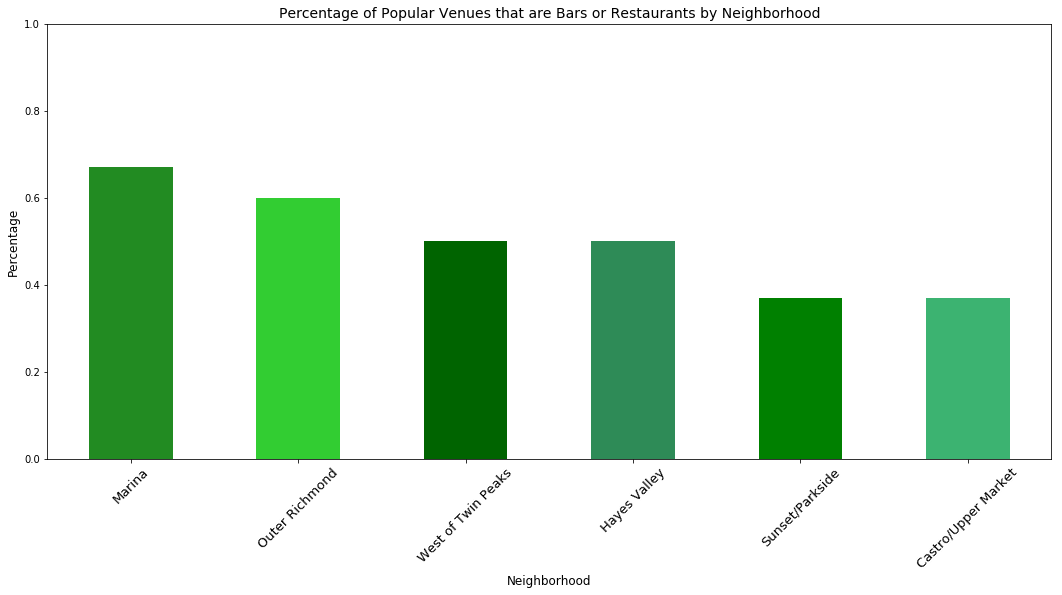

In [34]:
SF_rb = SF_merged[['Neighborhood','Bars and Restaurants']]
SF_rb.rename(columns={'Bars and Restaurants': 'Frequency'}, inplace = True)
SF_rb.sort_values('Frequency', inplace = True, ascending = False)
SF_rb.plot.bar(x='Neighborhood',y ='Frequency', rot = 45, figsize = (18, 8), legend = None, color = ['forestgreen','limegreen','darkgreen','seagreen','green','mediumseagreen'])
plt.ylabel('Percentage', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylim(0,1)
plt.title('Percentage of Popular Venues that are Bars or Restaurants by Neighborhood', fontsize = 14)
plt.show()

### Map Clustered Neighborhoods

Next, let's pull the coordinates for San Francisco and build a map.

In [35]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="SF_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.


Finally, let's map our clustered neighborhoods to see which ones are more similar.

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(.7, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# # add markers to the map
markers_colors = []
for lat, lon, poi, cluster, bars in zip(SF_merged['Latitude'], SF_merged['Longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels'], SF_merged['Bars and Restaurants']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=35*bars,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## 3. Results and Discussion

We have pulled data on crime rates and business registrations for every neighborhood in San Francisco and used this information to narrow down our neighborhood options to 6 neighborhoods. Our analysis has informed us that:
- Coffee shops, Chinese Restaurants, Sandwich Shops, French restaurants, and Wine Bars are the most common venues in our 6 preferred neighborhoods.
- Clustering neighborhoods based on their most popular venues grouped Hayes Valley with Castro into a cluster, West of Twin Peaks, Outer Richmond and Marina into another cluster, and Sunset as its own independent cluster.
- Marina and Outer Richmond have majority bars and restaurants as popular venues, whereas most of the popular venues in Sunset and Castro are not bars or restaurants, but locations like parks and yoga studios.
- From Zumper’s report in Figure 2, we know Marina, Castro, and Hayes Valley are more expensive places to live, with the median rent for a one-bedroom of at least $3,500.
- Sunset, Outer Richmond, and West of Twin Peaks are more affordable and have a median rent for a one-bedroom of less than $3,000.

Based on this analysis, Outer Richmond seems to offer a good balance between foot traffic, popularity for restaurants and bars, and rent prices. Marina seems to be a hot spot for restaurants and bars, but also comes with the high cost of rent. Castro and Hayes Valley come with the same expense as Marina, but neither is as hot of a destination for restaurants and dining. West of Twin Peaks seems to have a similar feel to Marina and Outer Richmond based on clustering but is the least busy neighborhood of the 6. Sunset also has cheaper rent, but the popular spots tend to be more recreational in nature (e.g. lakes and playgrounds). 

Ultimately, the optimal bar spot depends on what type of bar you would like to open. An upscale and trendy bar might fare better against competition in an expensive and bustling area like Marina, whereas a dive bar may be the go-to spot in an area like West of Twin Peaks, which likely receives most of its foot traffic exclusively from its residents.

A major drawback of this analysis is that the clustering was completely based on Foursquare’ s data for popular venues. There are plenty other ways to assess popularity of neighborhoods and the spots inside them, venue popularity is just one of them. It may also be helpful to look exclusively at bars in an area, how many there are, and how popular they are on weekdays and weekends.


## 4. Conclusion

Finally, we have executed an end-to-end data science project using common python libraries to manipulate data sets, Foursquare API to explore the neighborhoods of San Francisco, and Folium leaflet map to cluster and segment neighborhoods. This was just one use-case. These analytical tools open a world of possibilities for strategic decision making across the various realms of business: from healthcare to real estate to energy. All you need is a little curiosity and the desire to learn!
